In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [6]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [ ]:
####  두 리스트 열 방향으로 합치기 : 2차원 배열

In [8]:
fish_data = np.column_stack((fish_length, fish_weight))

In [9]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

**라벨 데이터**

In [12]:
np.ones(35) # 1값을 35개
np.zeros(14) # 0값을 14개

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # 튜플 형태로 보내줘야 함

In [16]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 사이킷런으로  훈련 데이터와 테스트 데이터 나누기

In [17]:
from sklearn.model_selection import train_test_split

train_test_split(매개변수)

- *array : feature dataset, label dataset (필수 변수 ) (주소가 있는 변수를 의미)
- shuffle = True
- random_state = None => 대부분 설정하게 됨
- stratify = None => 기준 데이터 설정

In [19]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, 
                                                                      fish_target,
                                                                      random_state=42)

In [21]:
test_input.shape
train_input.shape

(13, 2)

(36, 2)

In [23]:
test_target.shape
train_target.shape

(13,)

(36,)

In [24]:
print(pd.Series(fish_target).value_counts())
print(pd.Series(test_target).value_counts())

1.0    35
0.0    14
dtype: int64
1.0    10
0.0     3
dtype: int64


**데이터 분포를 명시적으로 반영시킨 분할 :** (stratify = None => 기준 데이터 설정 기준점 지정)

In [25]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, 
                                                                      fish_target,
                                                                      stratify = fish_target, # fishtarget에 있는 0과 1의 분포 고려
                                                                      random_state=42)

In [26]:
print(pd.Series(fish_target).value_counts())
print(pd.Series(test_target).value_counts())

1.0    35
0.0    14
dtype: int64
1.0    9
0.0    4
dtype: int64


## 성능 평가 및 테스트

In [27]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


KNeighborsClassifier()

1.0

### 도미 데이터 : 길이 25, 무게 150에 대한 분류 결과는?

In [29]:
kn.predict([[25,150]]) #빙어로 분류

array([0.])

테스트할 새로운 데이터를 포함한 산점도

Text(0.5, 0, 'length')

Text(0, 0.5, 'weight')

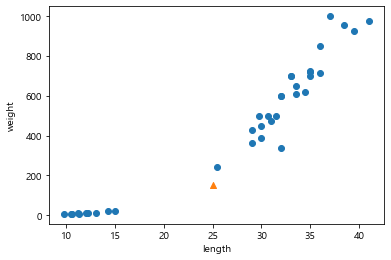

In [30]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


### 테스트할 데이터와 이웃하는 데이터들 

In [34]:
dist, idx = kn.kneighbors([[25, 150]]) # kn.kneighbors = 5 기본값
#[25, 150]와 이웃한 값을 보여줌

In [37]:
dist #거리값
idx #index

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

array([[21, 33, 19, 30,  1]], dtype=int64)

In [38]:
train_input[idx]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

Text(0.5, 0, 'length')

Text(0, 0.5, 'weight')

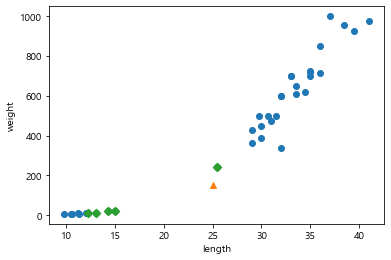

In [39]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [40]:
print(train_target[idx])

[[1. 0. 0. 0. 0.]]


## 기준을 맞춰라

(0.0, 1000.0)

Text(0.5, 0, 'length')

Text(0, 0.5, 'weight')

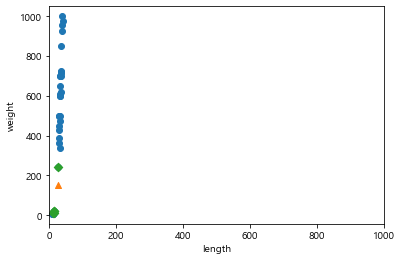

In [42]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx, 0], train_input[idx,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


#### 최근접 이웃 알고리즘은 거리를 기반으로 가까운 이웃을 결정
    - 거리 계산시 자료값이 큰변수에 더 큰 영향을 받게 됨

### 두변수의 스케일을 동일하게 하는 법
- 표준점수 (Z-Score)

- 표준 점수는 통계학적으로 정규분포를 만들고 개개의 경우가 표준편차상에 어떤 위치를 차지하는지를 보여주는 차원없는 수치이다. 
- 표준값, Z값, Z 점수이라고도 한다. 
- 학력고사 등의 평가에서 개개인의 성적이 전체에서 어떤 위치를 차지하는지를 보여주기 위해 쓰이기도 한다.
- 원점수 - 평균 / 표준편차

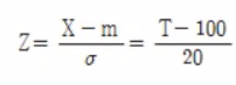

In [44]:
mean = np.mean(train_input, axis=0)
mean

array([ 27.29722222, 454.09722222])

In [45]:
std = np.std(train_input, axis =0)
std

array([  9.98244253, 323.29893931])

In [46]:
train_scaled = (train_input - mean)/std

In [47]:
print(train_scaled[:10])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]]


Text(0.5, 0, 'length')

Text(0, 0.5, 'weight')

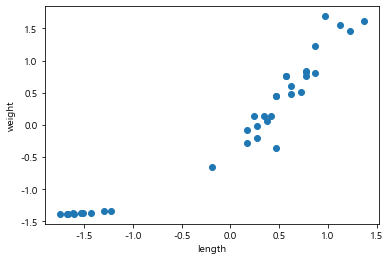

In [49]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


# x축과 y축의 범위가 같아짐

### 전처리 데이터로 모델 훈련하기

In [51]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [52]:
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [53]:
test_input

array([[ 11. ,   9.7],
       [ 11.8,   9.9],
       [ 29.7, 450. ],
       [ 11.8,  10. ],
       [ 26.5, 340. ],
       [ 12.4,  13.4],
       [ 34. , 685. ],
       [ 34. , 575. ],
       [ 38.5, 920. ],
       [ 35. , 680. ],
       [ 26.3, 290. ],
       [ 31. , 500. ],
       [ 41. , 950. ]])

In [55]:
new = ([24,150]-mean)/std
new

array([-0.33030215, -0.94060693])

Text(0.5, 0, 'length')

Text(0, 0.5, 'weight')

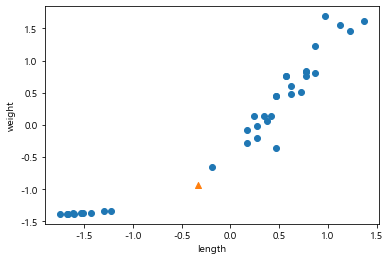

In [56]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [57]:
kn.predict([new]) # 0이 아니라 1인 것을 확인 스켈링 작업이 필요

array([1.])

In [58]:
dist,idx = kn.kneighbors([new])
print(dist, idx)

[[0.31724914 0.82761167 0.95516834 0.98731393 0.99379799]] [[21 14 34 33 32]]


Text(0.5, 0, 'length')

Text(0, 0.5, 'weight')

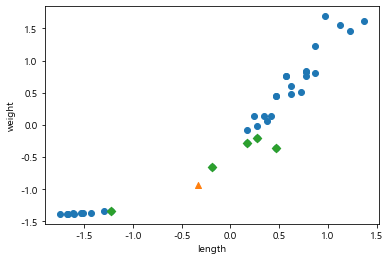

In [60]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[idx,0], train_scaled[idx,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 도미 쪽에  4개로 변경한 것을 확인 가능